# CIFAR100 (Canadian Institute For Advanced Research 100)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import cifar100
from keras.layers import (
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    MaxPooling2D,
    ReLU,
    Softmax,
)
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## CNN


In [19]:
cnn = Sequential(
    layers=[
        Input(shape=(32, 32, 3)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Dropout(0.25),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(100),
        Softmax(),
    ],
    name="cnn",
)

In [20]:
cnn.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Softmax name=softmax_1, built=True>]

In [21]:
cnn.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 100)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,062,500 (4.05 MB)

 Trainable params: 1,062,500 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
cnn.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

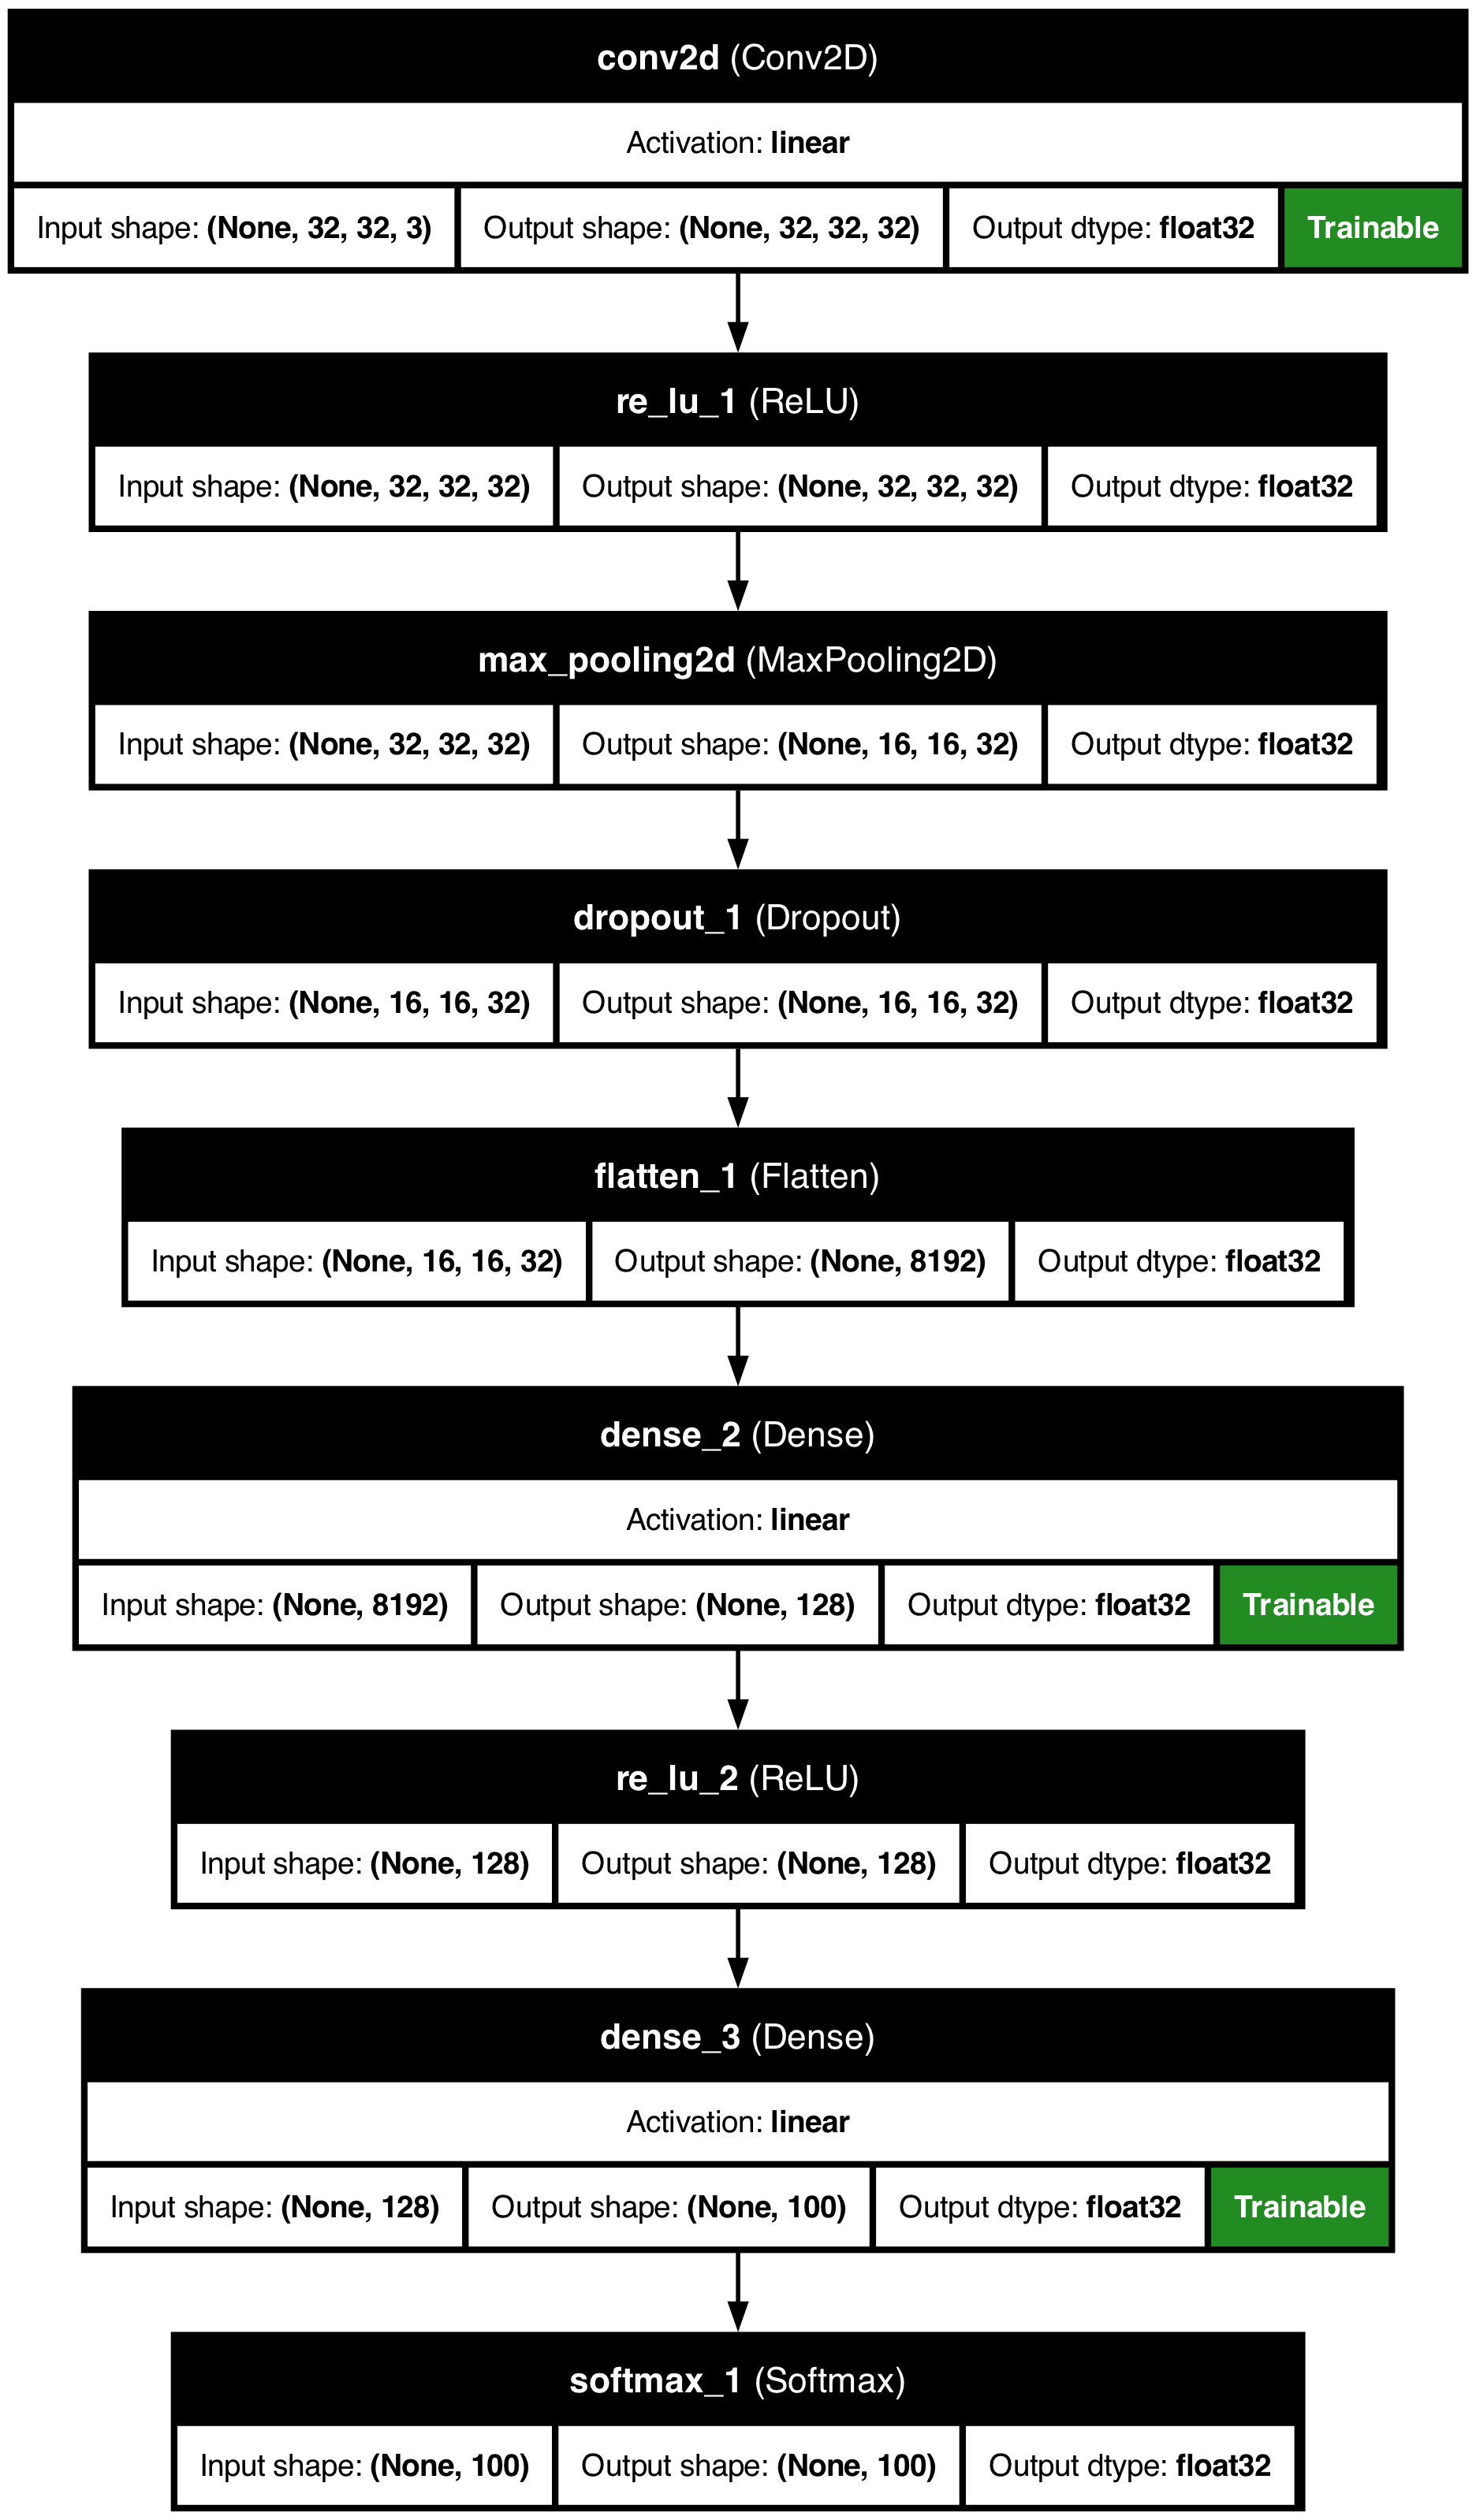

In [23]:
plot_model(
    cnn,
    to_file="Images/cifar100_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [24]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../../../Models/cifar100_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../../../Logs/cifar100_cnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/cifar10_cnn_logs"

cnn_csvlogger_callback = CSVLogger("../../../Logs/cifar100_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - loss: 4.2459 - sparse_categorical_accuracy: 0.0592 - val_loss: 3.5843 - val_sparse_categorical_accuracy: 0.1523
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - loss: 3.3697 - sparse_categorical_accuracy: 0.1974 - val_loss: 3.2231 - val_sparse_categorical_accuracy: 0.2286
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 3.0710 - sparse_categorical_accuracy: 0.2543 - val_loss: 3.0700 - val_sparse_categorical_accuracy: 0.2522
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - loss: 2.8636 - sparse_categorical_accuracy: 0.2897 - val_loss: 2.9997 - val_sparse_categorical_accuracy: 0.2744
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 2.7530 - sparse_categorical_accuracy: 0.3163 - val_loss: 2.9378 - val_sparse_categorical_accuracy: 0.2852


In [25]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 3.1845077991485597
Validation loss: 3.162984323501587
0.234635 Training accuracy with a standard deviation of 0.075566
0.238540 Validation accuracy with a standard deviation of 0.047299


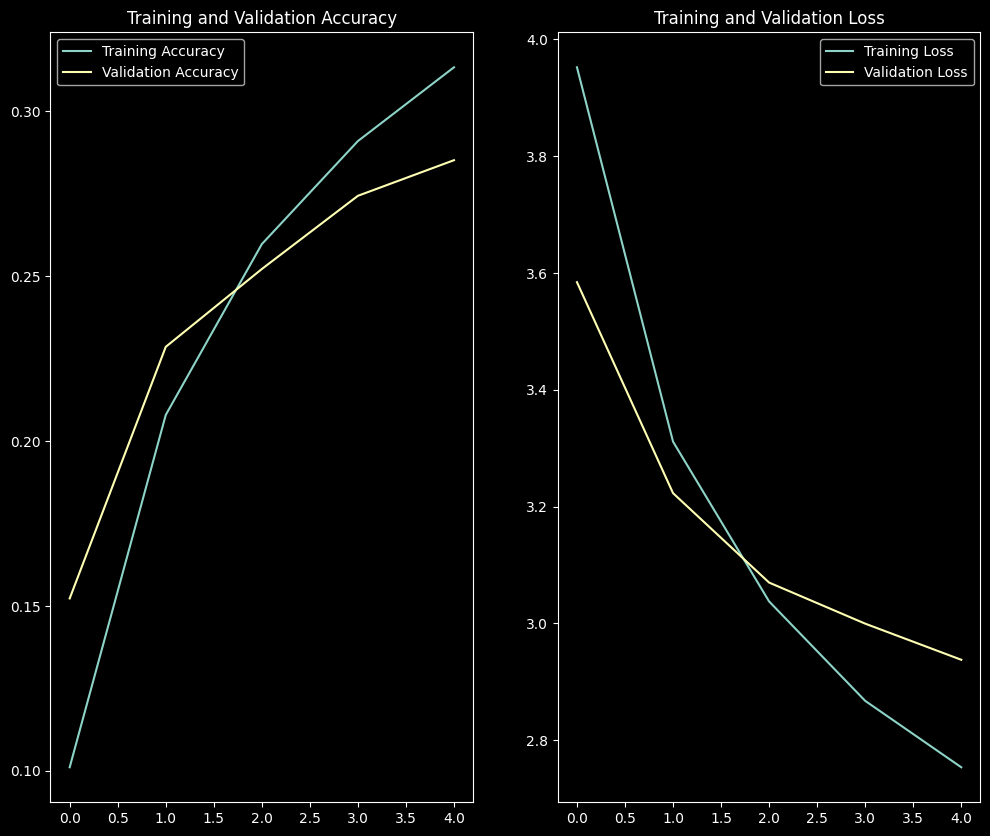

In [26]:
epochs_range = range(5)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("Images/cifar100_cnn_acc_loss.png", bbox_inches="tight")

In [27]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.9104 - sparse_categorical_accuracy: 0.2860
Test loss: 2.921811819076538
Test accuracy: 0.28610000014305115


In [28]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
